## Dehli-Indian-Housing-Analysis-Part-4-Predict-Price-with-Location-Name-compare-with-Prediciting-with-House-Type by Dumisani Maxwell Mukuchura

#### Dataset Source: *https://www.kaggle.com/datasets/bhavyadhingra00020/india-rental-house-price*

##### Contact: dumisanimukuchura@gmail.com | LinkedIn: https://www.linkedin.com/in/dumisani-maxwell-mukuchura-4859b7170/

##### This Project will explore the Dehli Indian Housing and build a model predicting rental price from Location Name and also from House Type i.e Compare of the 2 features which is better at Predicting Price.

Building from Part 3 of this series we noticed Location in terms of Latitude and Longidude coordinates it was not the best Feature to use to Predict the Rental Prices.

## 1. Prepare Data

### Modules and Library Import

In [1]:
# Library and Module import

import os #For File and Directory Operations

#For Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#For One Hot Encoding Categorical Features
from category_encoders import OneHotEncoder

#For splitting the Data into Training and Test Data
from sklearn.model_selection import train_test_split

#For Model Building
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [2]:
# Import Data building from Part 3 where we have a Clean Data Frame

#Get the current working directory
current_dir = os.getcwd()

#Trim to one level above
base_dir = os.path.dirname(current_dir)

#Construct the path to get the Data Folder
data_dir = os.path.join(base_dir, "data")

#Construct the full path to the CSV file
csv_file_path = os.path.join(data_dir, "Dehli-Indian-Housing-Clean-Data.csv")

#Read the csv file into a DataFrame
housing_data = pd.read_csv(csv_file_path)

#Make a copy to keep the original dataset intact
housing_df = housing_data.copy()

housing_df.head()

,house_type,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,numBedroom,house_layout,house_size_in_sqft,price_approx_usd
0,Independent Floor,Guru Angad Nagar,Delhi,28.635309,77.224960,13000,INR,2.0,1.0,Negotiable,0.29,Posted 4 years ago,Itâs a 2 bhk builder floor situated in Guru ...,"13,000",Unfurnished,2,BHK,517.0,151.59
1,Independent House,Tuglak Road,Delhi,28.595453,77.210335,2162955,INR,4.0,2.0,Not Negotiable,4.03,Posted a year ago,Well designed 5 bhk independent house is avail...,"65,41,919",Unfurnished,5,BHK,6251.0,25221.02
2,Villa,Tuglak Road,Delhi,28.595453,77.210335,2010105,INR,4.0,2.0,Not Negotiable,4.21,Posted a year ago,Its four bhk villa in the super location of de...,"60,10,155",Unfurnished,4,BHK,5562.0,23438.72
3,Independent Floor,Saket,Delhi,28.523548,77.200142,235562,INR,3.0,2.0,Not Negotiable,0.96,Posted a year ago,Itâs a 3 bhk builder floor situated in Saket...,"7,51,225",Unfurnished,3,BHK,2855.0,2746.76
4,Independent Floor,Saket,Delhi,28.523548,77.200142,301011,INR,3.0,2.0,Not Negotiable,1.28,Posted a year ago,Well designed 3 bhk builder floor is available...,"10,10,202",Unfurnished,3,BHK,2741.0,3509.92


## 2. Explore  

### Understand the Qualities of the 2 Features we shall need 'house_type' , 'location'

In [34]:
# Find how many unique values are within the 2 Features we shall need to explore 

print("Unique Values within Location Name:", housing_df["location"].nunique())

Unique Values within Location Name: 139


In [4]:
print("Unique Values within Location Name:", housing_df["house_type"].nunique())

Unique Values within Location Name: 6


In [5]:
#Print the Unique Values in Location Name column

print(housing_df["location"].unique())

['Guru Angad Nagar' 'Tuglak Road' 'Saket' 'Maharani Bagh'
 'New Friends Colony' 'Anand Niketan' 'Golf Links' 'Friends Colony'
 'Geetanjali Enclave' 'Sarvodaya Enclave' 'New Moti Nagar' 'Shivalik'
 'Malviya Nagar' 'Shahpur Jat Village' 'Sheikh Sarai' 'Naraina Vihar'
 'Karampura' 'laxmi nagar' 'Mayur Vihar II' 'Rajinder Nagar'
 'Vasant Vihar' 'Janakpuri' 'Greater Kailash' 'Defence Colony'
 'Sunder Nagar' 'Jor bagh' 'mayur vihar phase 1' 'Shanti Niketan'
 'Mayur Vihar Phase II' 'Niti Bagh' 'Safdarjung Enclave' 'Sarvpriya Vihar'
 'West End' 'Sainik Farm' 'Hauz Khas' 'Navjeevan Vihar' 'Ghitorni'
 'Vasant Kunj' 'Chattarpur' 'Prithviraj Road' 'Malcha Marg'
 'Greater Kailash II' 'Panchsheel Park' 'Panchsheel Enclave' 'Lodhi Road'
 'Tilak Marg' 'Gulmohar park' 'Mahavir Enclave' 'Sector 2 Dwarka'
 'Sector 3 Dwarka' 'New Rajinder Nagar' 'Aurungzeb Road'
 'Amrita Shergill Marg' 'Babar Road' 'Lodhi Gardens' 'Lodhi Estate'
 'Green Park Extension' 'Green Park' 'Uday Park' 'East Patel Nagar'
 'New Raj

In [6]:
#Print the Unique Values in House Type column 

print(housing_df["house_type"].unique())

['Independent Floor ' 'Independent House ' 'Villa ' 'Apartment '
 'Studio Apartment ' 'penthouse ']


From this Exploration it is clear that the Location Names are many; 139 of them and we must navigate such High Cardinal Feature in a way that keeps perfomance without eating away compute, on the other end with House Type we only have 6 which can be worked with/ We proceed now to deal with the categorical Features for the Model Building

In [7]:
# Check the number of Non Null Values in the Features of Interest

housing_df[["house_type", "location"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   house_type  2171 non-null   object
 1   location    2171 non-null   object
dtypes: object(2)
memory usage: 34.1+ KB


There are no Null Values within those Features.

## 3. Split Data 

### Splitting Data for Location Feature

In [35]:
# Splitting Data for Location Feature
feature = ["location"]
target = "price_approx_usd"
X_loc = housing_df[feature]
y_loc = housing_df[target] 

X_train_loc, X_test_loc, y_train_loc, y_test_loc = train_test_split(X_loc, y_loc, test_size=0.2, random_state=42)  # test_size=0.2 means 20% of data goes to test set

#Confirm the Split 
print("X_train_loc:\n", X_train_loc.head())
print("X_test_loc:\n", X_test_loc.head())
print("y_train_loc:\n", y_train_loc.head())
print("y_test_loc:\n", y_test_loc.head())
print("Unique Values within Location Name:", X_train_loc["location"].nunique())

X_train_loc:
                 location
555                Saket
1435        Vasant Vihar
588        Gulmohar park
1532  Safdarjung Enclave
20         Anand Niketan
X_test_loc:
              location
1652         Jor bagh
342      Sunder Nagar
1342  Panchsheel Park
765     Anand Niketan
865      Vasant Vihar
y_train_loc:
 555     3510.05
1435    3512.41
588     3511.12
1532    7463.90
20      4222.55
Name: price_approx_usd, dtype: float64
y_test_loc:
 1652    5877.04
342     3509.93
1342     757.93
765     3509.93
865     3509.92
Name: price_approx_usd, dtype: float64
Unique Values within Location Name: 120


### Splitting Data for House Type Feature

In [9]:
# Splitting Data for Location Feature
feature = ["house_type"]
target = "price_approx_usd"
X_hse_type = housing_df[feature]
y_hse_type = housing_df[target] 

X_train_hse_type, X_test_hse_type, y_train_hse_type, y_test_hse_type = train_test_split(X_hse_type, y_hse_type, test_size=0.2, random_state=42)  # test_size=0.2 means 20% of data goes to test set

#Confirm the Split 
print("X_train_hse_type:\n", X_train_hse_type.head())
print("X_test_hse_type:\n", X_test_hse_type.head())
print("y_train_hse_type:\n", y_train_hse_type.head())
print("y_test_hse_type:\n", y_test_hse_type.head())

X_train_hse_type:
               house_type
555   Independent Floor 
1435  Independent Floor 
588   Independent Floor 
1532  Independent House 
20    Independent Floor 
X_test_hse_type:
               house_type
1652  Independent Floor 
342   Independent Floor 
1342  Independent Floor 
765   Independent Floor 
865   Independent Floor 
y_train_hse_type:
 555     3510.05
1435    3512.41
588     3511.12
1532    7463.90
20      4222.55
Name: price_approx_usd, dtype: float64
y_test_hse_type:
 1652    5877.04
342     3509.93
1342     757.93
765     3509.93
865     3509.92
Name: price_approx_usd, dtype: float64


## 4: Build Model

### Create a Baseline 

In [10]:
#Baseline model for Location

y_mean_loc = y_train_loc.mean()
y_pred_baseline_loc = [y_mean_loc] * len(y_train_loc)
print(y_pred_baseline_loc[:5])
baseline_mae_loc = mean_absolute_error(y_train_loc, y_pred_baseline_loc)

print(f"The Mean of the Target Vector is ${round(y_mean_loc, 2)} and if we guessed it for every output we would be off by a +/- ${round(baseline_mae_loc,2)}")

[4282.210351382489, 4282.210351382489, 4282.210351382489, 4282.210351382489, 4282.210351382489]
The Mean of the Target Vector is $4282.21 and if we guessed it for every output we would be off by a +/- $2076.93


In [11]:
#Baseline model for House Type

y_mean_hse_type = y_train_hse_type.mean()
y_pred_baseline_hse_type = [y_mean_hse_type] * len(y_train_hse_type)
print(y_pred_baseline_hse_type[:5])
baseline_mae_hse_type = mean_absolute_error(y_train_hse_type, y_pred_baseline_hse_type)

print(f"The Mean of the Target Vector is ${round(y_mean_hse_type, 2)} and if we guessed it for every output we would be off by a +/- ${round(baseline_mae_hse_type,2)}")

[4282.210351382489, 4282.210351382489, 4282.210351382489, 4282.210351382489, 4282.210351382489]
The Mean of the Target Vector is $4282.21 and if we guessed it for every output we would be off by a +/- $2076.93


These values are the same as we are using a single Target

### Iterate

### For the Location Name Model

In [36]:
# Check OneHotEncoding resulting DF for the drop off from 139 to 120 categories

#Instantiate OHE
ohe = OneHotEncoder(use_cat_names=True)
#Fit OHE
ohe.fit(X_train_loc)
#Transform
XT_train = ohe.transform(X_train_loc)
print(XT_train.shape)
XT_train.head()

(1736, 120)


,location_Saket,location_Vasant Vihar,location_Gulmohar park,location_Safdarjung Enclave,location_Anand Niketan,location_Defence Colony,location_East of Kailash,location_West End,location_Greater Kailash II,location_Niti Bagh,...,location_Mahavir Enclave,location_Manglapuri,location_Kailash Colony,location_dda flat,location_Rohini sector 16,location_Hemkunt Colony,location_C R Park,location_Sector-7 Rohini,location_Lodhi Estate,location_Anand Vihar
555,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1435,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1532,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Build the Location Model

model_loc = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)

model_loc.fit(X_train_loc, y_train_loc)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['location'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [13]:
#Check if Location Model is Fitted

check_is_fitted(model_loc)

### For the House Type Model

In [14]:
#Build the House Type Model

model_hse_type = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)

model_hse_type.fit(X_train_hse_type, y_train_hse_type)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['house_type'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [15]:
#Check if House Type Model is Fitted

check_is_fitted(model_hse_type)

### Evaluate Models 

### Evaluating the Location Model



In [16]:
# Evaluating the Location Model on training data

y_pred_training_loc = model_loc.predict(X_train_loc)
print(y_pred_training_loc[:5])

mae_training_loc = mean_absolute_error(y_train_loc, y_pred_training_loc)

print(f"The Mean Absolute Error of the Location Model on the Training Data is ${round(mae_training_loc, 2)}") 

[3290.14214286 4749.36465753 4278.99819672 3677.14625    4370.11913793]
The Mean Absolute Error of the Location Model on the Training Data is $1217.6


In [17]:
# Evaluating the Location Model on Test data

y_pred_test_loc = model_loc.predict(X_test_loc)
print(y_pred_test_loc[:5])

mae_test_loc = mean_absolute_error(y_test_loc, y_pred_test_loc)

print(f"The Mean Absolute Error of the Location Model on the Training Data is ${round(mae_test_loc, 2)}") 

[6207.8165     6798.78627907 4470.27659091 4370.11913793 4749.36465753]
The Mean Absolute Error of the Location Model on the Training Data is $1299.97


### Evaluating the House Type Model

In [18]:
# Evaluating the Location Model on training data

y_pred_training_hse_type = model_hse_type.predict(X_train_hse_type)
print(y_pred_training_hse_type[:5])

mae_training_hse_type = mean_absolute_error(y_train_hse_type, y_pred_training_hse_type)

print(f"The Mean Absolute Error of the Location Model on the Training Data is ${round(mae_training_hse_type, 2)}") 

[3406.68210046 3406.68210046 3406.68210046 7343.01384615 3406.68210046]
The Mean Absolute Error of the Location Model on the Training Data is $1628.89


In [19]:
# Evaluating the Location Model on Test data

y_pred_test_hse_type = model_hse_type.predict(X_test_hse_type)
print(y_pred_test_hse_type[:5])

mae_test_hse_type = mean_absolute_error(y_test_hse_type, y_pred_test_hse_type)

print(f"The Mean Absolute Error of the Location Model on the Training Data is ${round(mae_test_hse_type, 2)}")

[3406.68210046 3406.68210046 3406.68210046 3406.68210046 3406.68210046]
The Mean Absolute Error of the Location Model on the Training Data is $1718.23


### Comparing Perfomance with Ridge Model

In [20]:
#Build the Location Model -Ridge

model_loc_ridge = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge()
)

model_loc_ridge.fit(X_train_loc, y_train_loc)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['location'], use_cat_names=True)),
                ('ridge', Ridge())])

In [21]:
# Evaluating the Location Model - Ridge on training data

y_pred_training_loc_ridge = model_loc_ridge.predict(X_train_loc)
print(y_pred_training_loc_ridge[:5])

mae_training_loc_ridge = mean_absolute_error(y_train_loc, y_pred_training_loc_ridge)

print(f"The Mean Absolute Error of the Location Model - Ridge on the Training Data is ${round(mae_training_loc_ridge, 2)}") 

[3292.48108958 4731.44705548 4265.19922751 3672.69565098 4354.07410349]
The Mean Absolute Error of the Location Model - Ridge on the Training Data is $1294.38


In [22]:
# Evaluating the Location Model - Ridge on test data

y_pred_test_loc_ridge = model_loc_ridge.predict(X_test_loc)
print(y_pred_test_loc_ridge[:5])

mae_test_loc_ridge = mean_absolute_error(y_test_loc, y_pred_test_loc_ridge)

print(f"The Mean Absolute Error of the Location Model - Ridge on the Training Data is ${round(mae_test_loc_ridge, 2)}") 

[6173.44175439 6722.07436604 4447.0140468  4354.07410349 4731.44705548]
The Mean Absolute Error of the Location Model - Ridge on the Training Data is $1358.26


From the Mean Absolute Error values we notice the LinearRegression() model performs better for than the Ridge Model and also that the Location Name is a better suited feature as compared to the House Type in predictionof the Rental Price. 

Next we move on to communicationg the model and results.

## 5. Communicate Results and Model Formula

### Communicating Results for the Location Name Model

In [28]:
# Get the Intercepts and Coefficients for the Location Name Model

intercept_loc = model_loc.named_steps["linearregression"].intercept_
coefficients_loc = model_loc.named_steps["linearregression"].coef_
print("Coefficients of the Location Name Linear Regression model length:", len(coefficients_loc))
print(coefficients_loc[:5])  # First five coefficients

# Get the associated Feature Names for the Location Name Model
feature_names_loc = model_loc.named_steps["onehotencoder"].get_feature_names_out()
print("features len:", len(feature_names_loc))
print(feature_names_loc[:5])  # First five feature names

Coefficients of the Location Name Linear Regression model length: 120
[ 346.35715224 1805.57966691 1335.2132061   733.36125938 1426.33414731]
features len: 120
['location_Saket' 'location_Vasant Vihar' 'location_Gulmohar park'
 'location_Safdarjung Enclave' 'location_Anand Niketan']


The reason we got 120 coefficients is because when we did the split of training data and test data and 19 unique values fell into the Training Dataset and win future there is need to update and deal with that issue. Ideas to explore are OneHotEncoder(use_cat_names=True, handle_unknown='ignore')  or the Stratified sampling from  sklearn the StratifiedShuffleSplit

In [30]:
# Create a series for the Features and Intercepts for the Location Model

feat_imp_loc = pd.Series(coefficients_loc, feature_names_loc)
feat_imp_loc.head()

location_Saket                  346.357152
location_Vasant Vihar          1805.579667
location_Gulmohar park         1335.213206
location_Safdarjung Enclave     733.361259
location_Anand Niketan         1426.334147
dtype: float64

In [32]:
# Print the formular for Location Name Model

print(f"rental price = {intercept_loc.round(2)}")
for f, c in feat_imp_loc.items():
    print(f"+ ({round(c, 2)} * {f})")

rental price = 2943.78
+ (346.36 * location_Saket)
+ (1805.58 * location_Vasant Vihar)
+ (1335.21 * location_Gulmohar park)
+ (733.36 * location_Safdarjung Enclave)
+ (1426.33 * location_Anand Niketan)
+ (951.62 * location_Defence Colony)
+ (-2613.16 * location_East of Kailash)
+ (1207.71 * location_West End)
+ (971.54 * location_Greater Kailash II)
+ (1083.97 * location_Niti Bagh)
+ (3673.14 * location_Golf Links)
+ (951.36 * location_New Friends Colony)
+ (13489.51 * location_Aurungzeb Road)
+ (774.63 * location_Green Park)
+ (-2800.94 * location_Sarita Vihar)
+ (2069.28 * location_Sainik Farm)
+ (-2372.42 * location_New Rajinder Nagar)
+ (1889.75 * location_Ghitorni)
+ (13290.6 * location_Tuglak Road)
+ (1914.55 * location_Shanti Niketan)
+ (1182.22 * location_Green Park Extension)
+ (890.0 * location_Uday Park)
+ (-2360.76 * location_Old Rajender Nagar)
+ (-2593.97 * location_Mayur Vihar 2 Phase)
+ (1033.82 * location_Friends Colony)
+ (-2827.18 * location_Shakti Nagar)
+ (12579.15

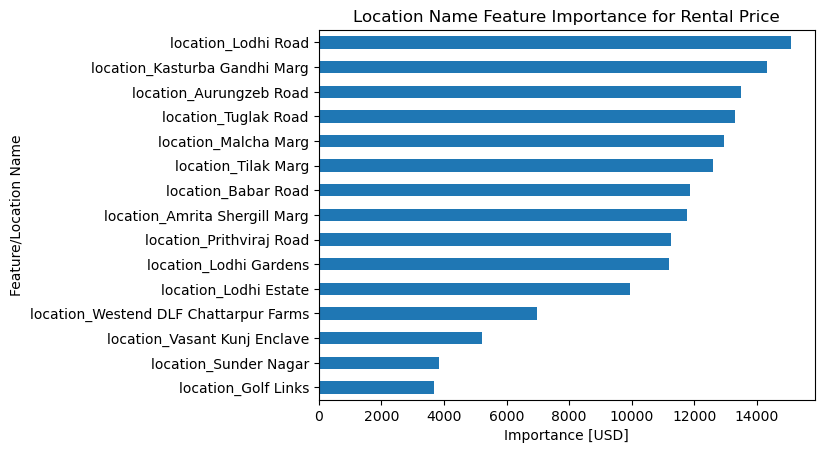

In [38]:
# Bar Chat of the Most Important Categories affecting the Rental Price 

feat_imp_loc.sort_values(key=abs).tail(15).plot(kind = "barh")
plt.xlabel("Importance [USD]")
plt.ylabel("Feature/Location Name")
plt.title("Location Name Feature Importance for Rental Price");

In [29]:
# Get the Intercepts and Coefficients for the Location Name Model

intercept_hse_type = model_hse_type.named_steps["linearregression"].intercept_
coefficients_hse_type = model_hse_type.named_steps["linearregression"].coef_
print("Coefficients of the House Type Linear Regression model length:", len(coefficients_hse_type))
print(coefficients_hse_type[:5])  # First five coefficients

# Get the associated Feature Names for the Location Name Model
feature_names_hse_type = model_hse_type.named_steps["onehotencoder"].get_feature_names_out()
print("features len:", len(feature_names_hse_type))
print(feature_names_hse_type[:5])  # First five feature names

Coefficients of the House Type Linear Regression model length: 5
[ -577.41197289  3358.91977281  3840.18014811 -2806.25744612
 -3815.43050191]
features len: 5
['house_type_Independent Floor ' 'house_type_Independent House '
 'house_type_Villa ' 'house_type_Apartment '
 'house_type_Studio Apartment ']


In [31]:
# Create a series for the Features and Intercepts for the House Type Model

feat_imp_hse_type = pd.Series(coefficients_hse_type, feature_names_hse_type)
feat_imp_hse_type.head()

house_type_Independent Floor     -577.411973
house_type_Independent House     3358.919773
house_type_Villa                 3840.180148
house_type_Apartment            -2806.257446
house_type_Studio Apartment     -3815.430502
dtype: float64

In [37]:
# Print the formular for House Type Model

print(f"rental price = {intercept_hse_type.round(2)}")
for f, c in feat_imp_hse_type.items():
    print(f"+ ({round(c, 2)} * {f})")

rental price = 3984.09
+ (-577.41 * house_type_Independent Floor )
+ (3358.92 * house_type_Independent House )
+ (3840.18 * house_type_Villa )
+ (-2806.26 * house_type_Apartment )
+ (-3815.43 * house_type_Studio Apartment )


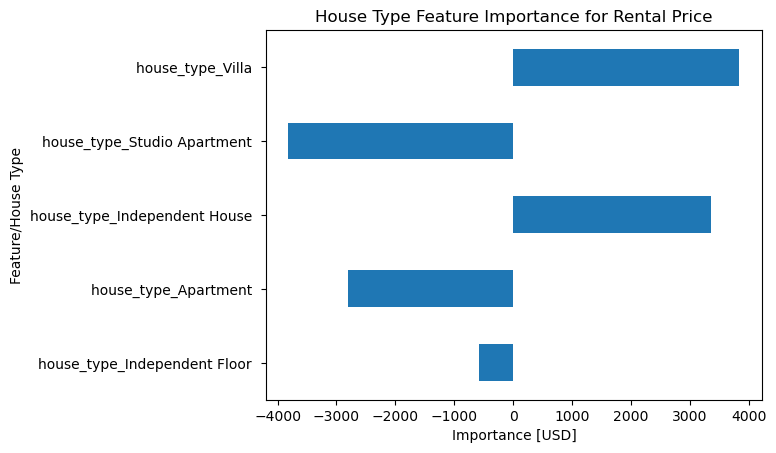

In [40]:
# Bar Chat of the Most Important Categories from House Type affecting the Rental Price 

feat_imp_hse_type.sort_values(key=abs).plot(kind = "barh")
plt.xlabel("Importance [USD]")
plt.ylabel("Feature/House Type")
plt.title("House Type Feature Importance for Rental Price");

With this analysis we notice that for House Type when it is somehow an Apartment it reduces the Rental Price and Independent Floors and Villas increase the rental price.